In [124]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

In [125]:
mu, Q, R = 0, 0.01, 0.001 # mean and standard deviation
n = 100
q = np.random.normal(mu, Q, size=(n,2,1))
r = np.random.normal(mu, Q, size=(n,2,1))


In [126]:
x=np.ones((2,1))
y=np.zeros((2,1))
A=np.array([[1,0],[-0.8,+0.5]])
H=np.array([[1,0]])
states=[]

x1=[]
x2=[]
x_real_1=[]
x_real_2=[]
y1=[]
y2=[]


In [127]:

for i in range(1,n):
    x = np.matmul(A,x) + q[i]
    y = np.matmul(H,x) + r[i]
    states.append(x)
    x1.append(x[0])
    x2.append(x[1])
    y1.append(y[0])
    y2.append(y[1])
    x_real_1.append(x[0]-q[i][0])
    x_real_2.append(x[1]-q[i][1])

y1=np.array(y1)
y2=np.array(y2)
y=np.concatenate((y1,y2),axis=1)


Prediction Step

In [128]:
x_bar = np.ones((2,1))*1
xbar=[]
x_bar_1 = []
x_bar_2 = []
P = np.ones((n,2,2))*0.1

s=0
v=0
k=0   
S=[]
V=[]
xbar.append(x_bar)
for i in range(1,n-1):
    # Prediction Step

    x_bar = np.matmul(A,x_bar)
    x_bar_1.append(x_bar[0])
    x_bar_2.append(x_bar[1])
    P[i] = np.matmul(A,np.matmul(P[i-1],np.transpose(A))) + Q
    # Update Step
    s=np.matmul(H,np.matmul(P[i],np.transpose(H))) + R
    s=np.array(s)
    S.append(s)

    v=np.reshape(y[i],(2,1))-np.matmul(H,x_bar)
    V.append(v)
    
    a=np.linalg.pinv(s)
    k=np.matmul(P[i],np.matmul(np.transpose(H),a))

    
    x_bar=x_bar+k*v
    xbar.append(x_bar)

    P[i]=np.matmul(np.identity(2)-np.matmul(k,H),np.transpose(P[i]))



In [129]:
print(np.shape(xbar))
print(np.shape(x2))

(99, 2, 1)
(99, 1)


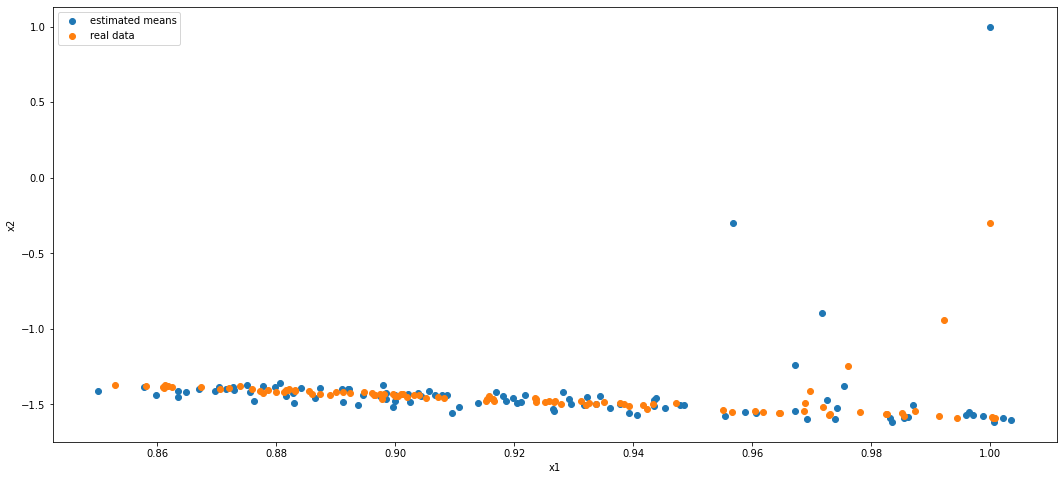

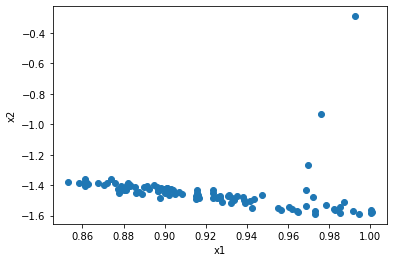

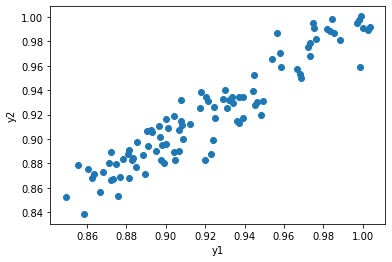

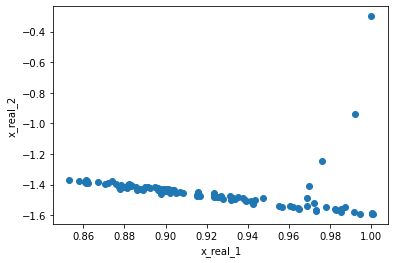

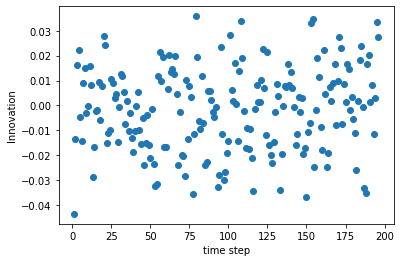

In [130]:
xbar1=[]
xbar2=[]
for i in range(len(xbar)):
    xbar1.append(xbar[i][0])
    xbar2.append(xbar[i][1])
    
e=((xbar1-x[0])**2+(xbar2-x[1])**2)**0.5

fig = plt.figure(figsize=(18,8))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("")
plt.scatter(xbar1,xbar2,label="estimated means")
plt.scatter(x_real_1,x_real_2,label="real data")
plt.legend()
plt.show() 

fig = plt.figure()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("")
plt.scatter(x1,x2,label="noisy data")
plt.show() 

fig = plt.figure()
plt.xlabel("y1")
plt.ylabel("y2")
plt.title("")
plt.scatter(y1,y2,label="observations")
plt.show()

fig = plt.figure()
plt.xlabel("x_real_1")
plt.ylabel("x_real_2")
plt.title("")
plt.scatter(x_real_1,x_real_2,label="real data")
plt.show()

fig = plt.figure()
plt.xlabel("time step")
plt.ylabel("Innovation")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(V)[0]*2+1)),np.shape(V)),V,label="real data")
plt.show()

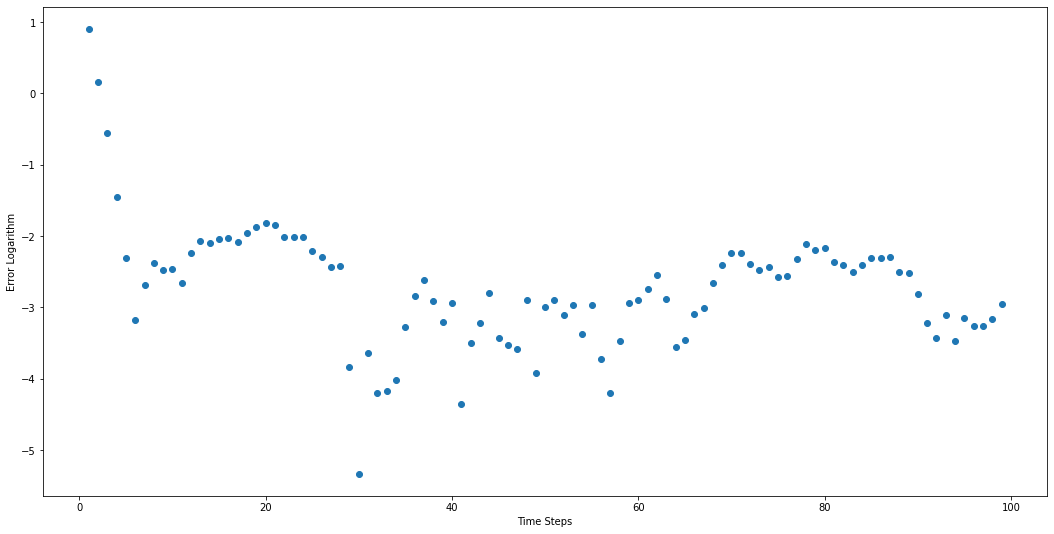

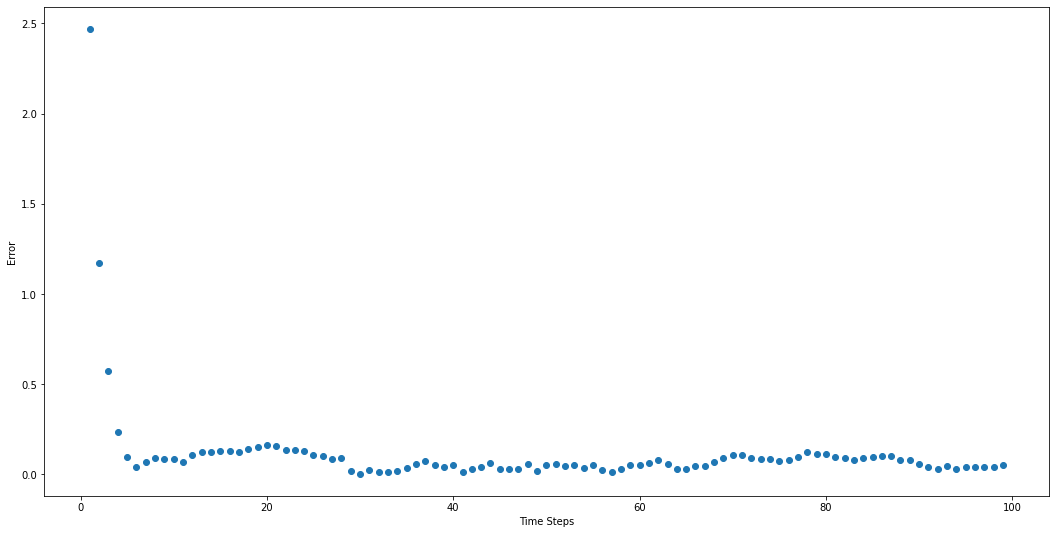

In [131]:
ln_e=np.log(e)

fig = plt.figure(figsize=(18,9))
plt.xlabel("Time Steps")
plt.ylabel("Error Logarithm")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(e)[0]+1)),np.shape(e)),ln_e,label="real error")
plt.show()

fig = plt.figure(figsize=(18,9))
plt.xlabel("Time Steps")
plt.ylabel("Error")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(e)[0]+1)),np.shape(e)),e,label="real error")
plt.show()

In [132]:
print(np.mean(e))
print(np.mean(V))
print(np.shape(V))
print(np.shape(S))

0.11270322457166636
-0.0016207794538737608
(98, 2, 1)
(98, 1, 1)


In [133]:
l=100
sigma=[]
for i in range(np.shape(S)[0]):
    b=(np.linalg.inv(S[i])*V[i])
    sigma.append(np.matmul(np.transpose(V[i]),b))
print(len(sigma))


98


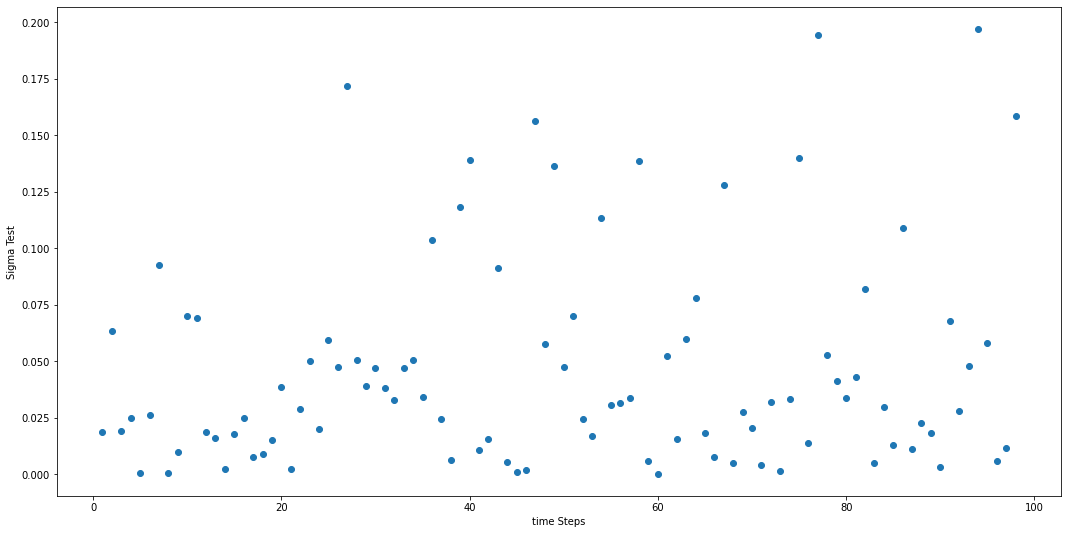

In [134]:
fig = plt.figure(figsize=(18,9))
plt.xlabel("time Steps")
plt.ylabel("Sigma Test")
plt.title("")
plt.scatter(np.arange(1,len(sigma)+1),sigma,label="real error")
plt.show()

In [135]:
z=0
for i in range(len(sigma)):
    if (np.abs(sigma[i]) > 3):
        z=z+1  
print(z)

print(e)

0
[[2.47007426]
 [1.17181309]
 [0.57327787]
 [0.23436656]
 [0.09904644]
 [0.0416992 ]
 [0.06762499]
 [0.09243718]
 [0.08388774]
 [0.08481083]
 [0.06997645]
 [0.1071264 ]
 [0.12588192]
 [0.12239   ]
 [0.12961267]
 [0.13196017]
 [0.12359403]
 [0.14087817]
 [0.15447532]
 [0.16276692]
 [0.15704075]
 [0.13271776]
 [0.13289549]
 [0.13256587]
 [0.11003556]
 [0.10114098]
 [0.08800822]
 [0.08888531]
 [0.02155113]
 [0.00484474]
 [0.02637924]
 [0.01494537]
 [0.01543446]
 [0.01803334]
 [0.03775577]
 [0.05867767]
 [0.07350675]
 [0.05463151]
 [0.04077473]
 [0.053002  ]
 [0.01289342]
 [0.03017446]
 [0.04017957]
 [0.06082524]
 [0.03236592]
 [0.02930441]
 [0.02759955]
 [0.05547033]
 [0.01985744]
 [0.04972762]
 [0.05540296]
 [0.04495149]
 [0.05160415]
 [0.03447219]
 [0.05162959]
 [0.02427367]
 [0.01488484]
 [0.03104556]
 [0.05267874]
 [0.05496808]
 [0.06429226]
 [0.07852638]
 [0.05596003]
 [0.02875348]
 [0.03161109]
 [0.04544218]
 [0.04913023]
 [0.07025434]
 [0.09030573]
 [0.10616992]
 [0.10688844]
 [0.